Intel Image Classification using CNN




In [2]:
!unzip /content/intel-image-classification.zip

Archive:  /content/intel-image-classification.zip
  inflating: seg_pred/seg_pred/10004.jpg  
  inflating: seg_pred/seg_pred/10005.jpg  
  inflating: seg_pred/seg_pred/10012.jpg  
  inflating: seg_pred/seg_pred/10013.jpg  
  inflating: seg_pred/seg_pred/10017.jpg  
  inflating: seg_pred/seg_pred/10021.jpg  
  inflating: seg_pred/seg_pred/1003.jpg  
  inflating: seg_pred/seg_pred/10034.jpg  
  inflating: seg_pred/seg_pred/10038.jpg  
  inflating: seg_pred/seg_pred/10040.jpg  
  inflating: seg_pred/seg_pred/10043.jpg  
  inflating: seg_pred/seg_pred/10045.jpg  
  inflating: seg_pred/seg_pred/10047.jpg  
  inflating: seg_pred/seg_pred/10048.jpg  
  inflating: seg_pred/seg_pred/10052.jpg  
  inflating: seg_pred/seg_pred/10054.jpg  
  inflating: seg_pred/seg_pred/10059.jpg  
  inflating: seg_pred/seg_pred/10060.jpg  
  inflating: seg_pred/seg_pred/10066.jpg  
  inflating: seg_pred/seg_pred/10069.jpg  
  inflating: seg_pred/seg_pred/10073.jpg  
  inflating: seg_pred/seg_pred/10079.jpg  
  inf

Importing the required libraries:

In [3]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


Loading the dataset from the directory.


In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier': 
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
       
        
        for image_file in  : #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resizing the image
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'buildings', 1:'forest',2:'glacier', 3:'mountain', 4:'sea',  5:'street'}
    
    return labels[class_code]

In [0]:
Images, Labels = get_images('/content/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

Finding shape of the train_set.

The Training data is in shape of (Number of Training Images, Width of image, Height of image, Channel of image). 

In [6]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


Extracting and plotting some random images from the dataset.

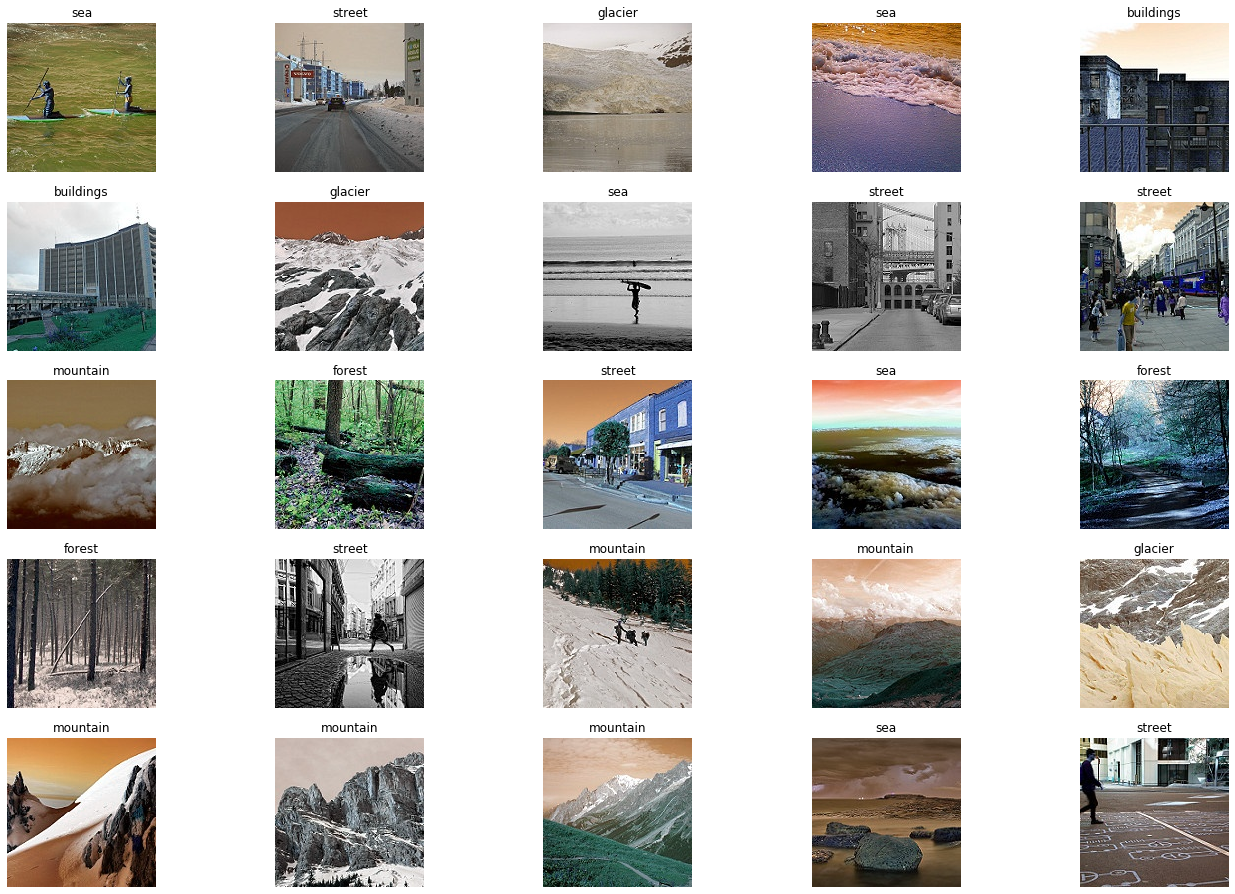

In [7]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

A basic CNN model:

In [8]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________

Training the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [9]:
trained = model.fit(Images,Labels,epochs=40,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/40
9823/9823 [==============================] - 132s 13ms/sample - loss: 1.4447 - acc: 0.4138 - val_loss: 1.1062 - val_acc: 0.5725
Epoch 2/40
9823/9823 [==============================] - 125s 13ms/sample - loss: 1.1626 - acc: 0.5343 - val_loss: 1.0411 - val_acc: 0.6181
Epoch 3/40
9823/9823 [==============================] - 126s 13ms/sample - loss: 1.0231 - acc: 0.6021 - val_loss: 0.8336 - val_acc: 0.6908
Epoch 4/40
9823/9823 [==============================] - 126s 13ms/sample - loss: 0.9132 - acc: 0.6547 - val_loss: 0.7876 - val_acc: 0.7198
Epoch 5/40
9823/9823 [==============================] - 126s 13ms/sample - loss: 0.8274 - acc: 0.7052 - val_loss: 0.6817 - val_acc: 0.7611
Epoch 6/40
9823/9823 [==============================] - 126s 13ms/sample - loss: 0.7481 - acc: 0.7341 - val_loss: 0.6684 - val_acc: 0.7590
Epoch 7/40
9823/9823 [==============================] - 126s 13ms/sample - loss: 0.7072 - acc: 0.7538 - val_loss: 0.61

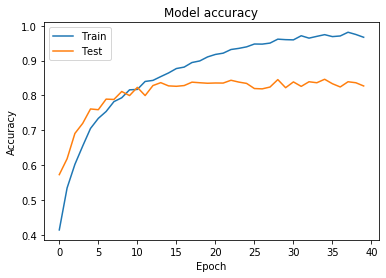

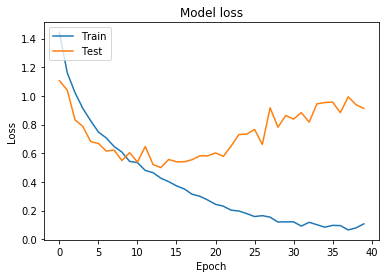

In [10]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

Evaluating the model using the test_set:

In [11]:
test_images,test_labels = get_images('/content/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 12s 4ms/sample - loss: 0.7925 - acc: 0.8383


[0.7925324116945267, 0.8383333]

Predicting the images from the prediction_set:

In [13]:
pred_images,no_labels = get_images('/content/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

Following image shows the predicted class label on top of the image and probabilities below of the image.

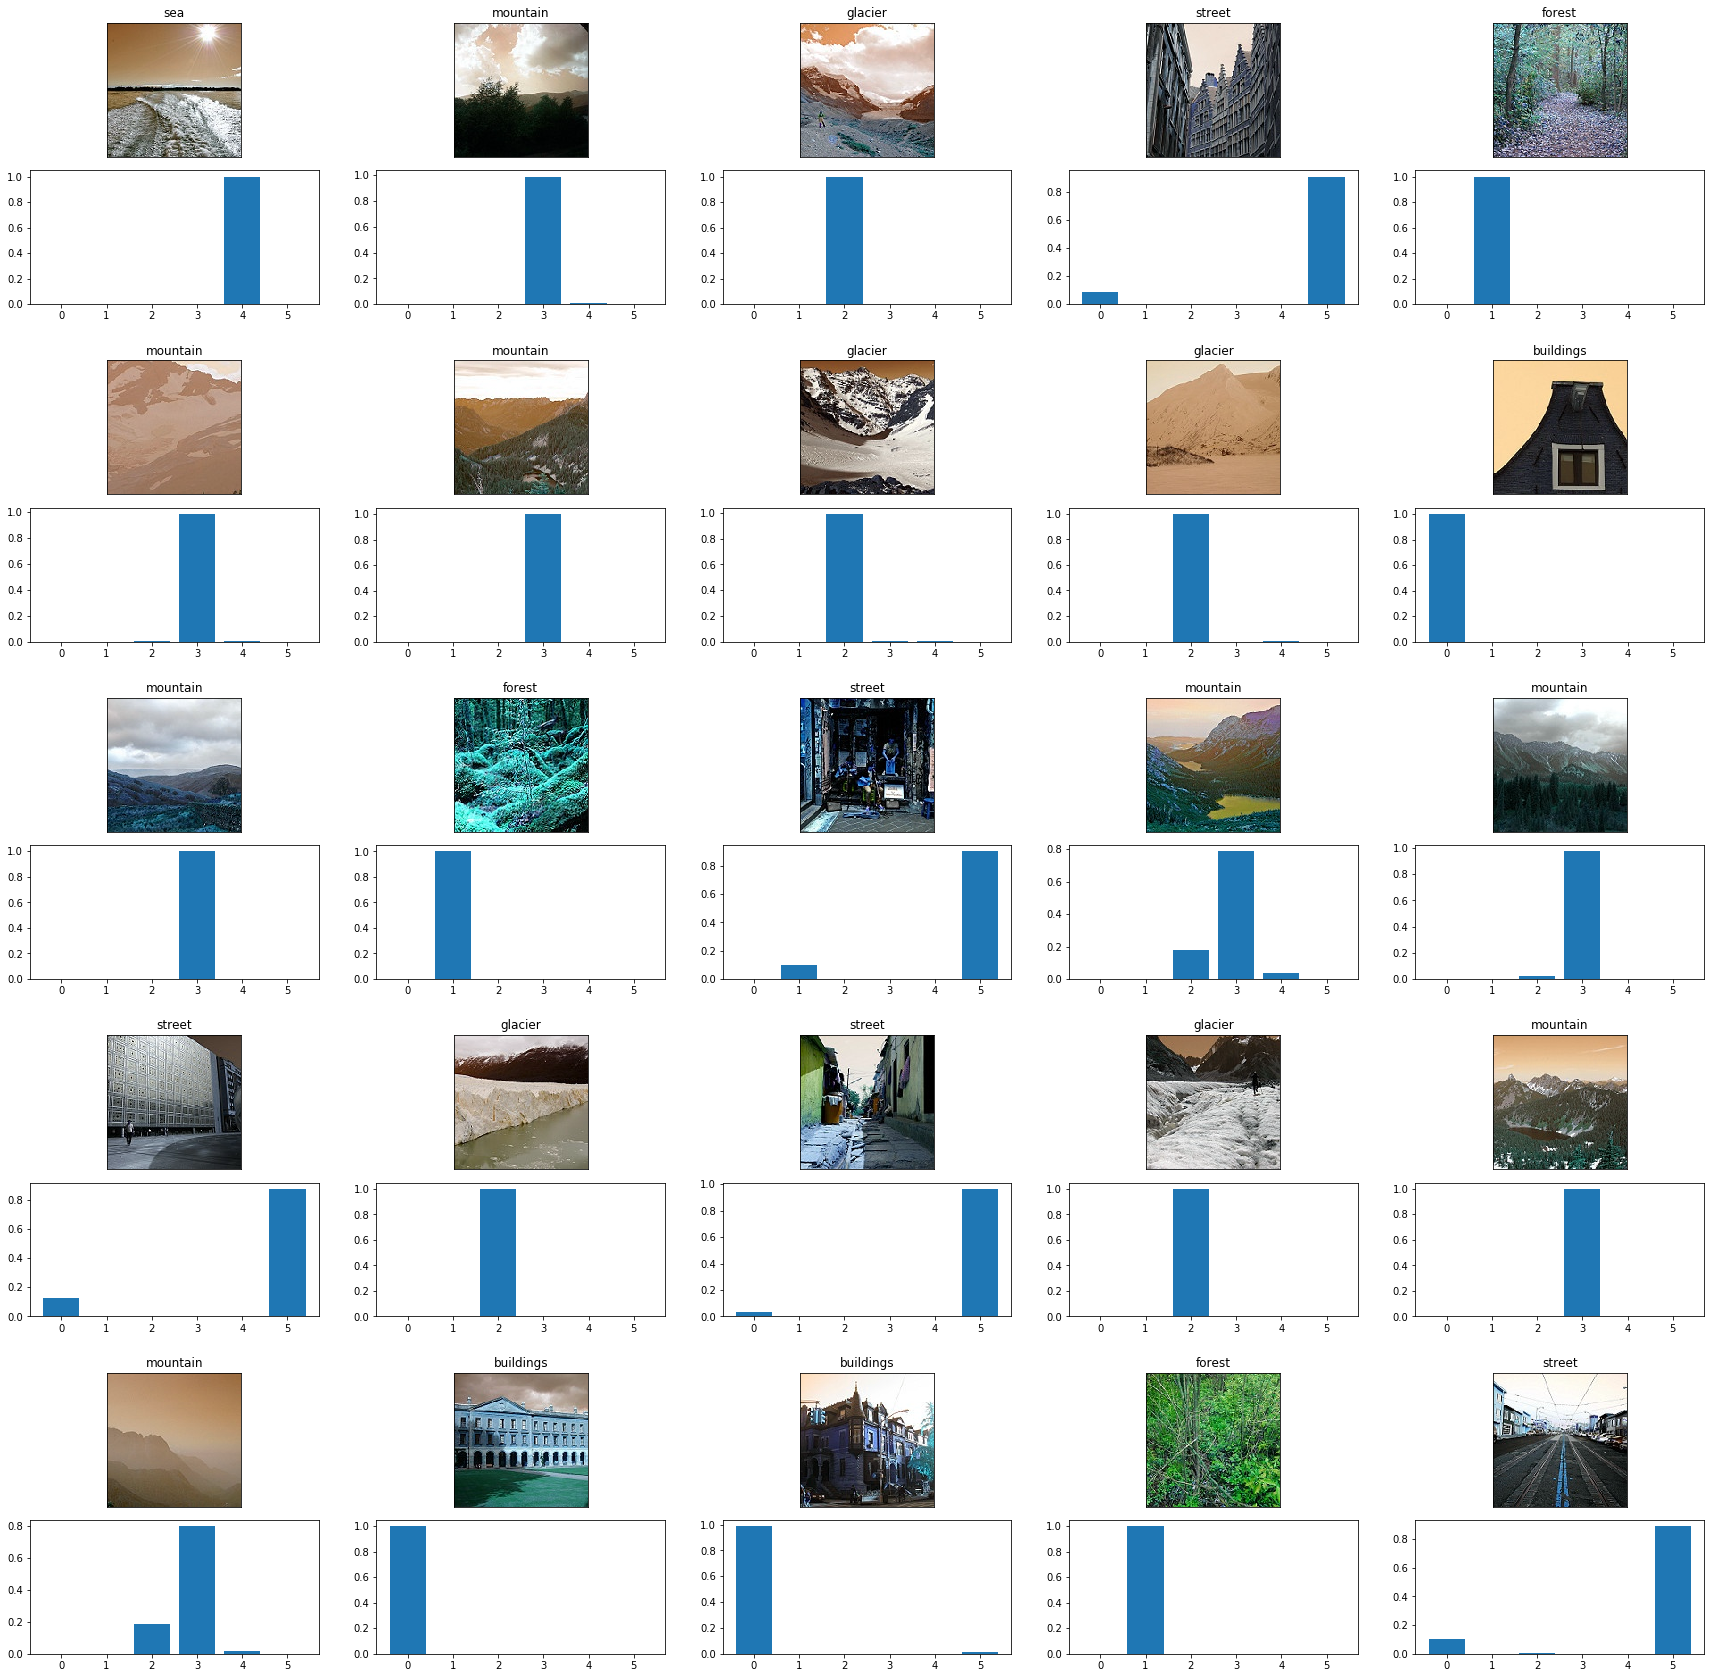

In [14]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()